In [1]:
import pandas as pd
import seaborn as sn
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Copper_Set.csv")
# df.head()

C:\Users\Bala Krishnan\AppData\Local\Temp\ipykernel_13328\961236247.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Copper_Set.csv")


In [3]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [6]:
df.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [7]:
df['material_ref'].fillna('None', inplace=True)

In [8]:
df = df.dropna()
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [9]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)

In [10]:
df.isna().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [11]:
df = df.dropna()
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [12]:
df1 = df.copy()
#df1

In [13]:
columns = ['quantity tons', 'application', 'thickness', 'width', 'selling_price']

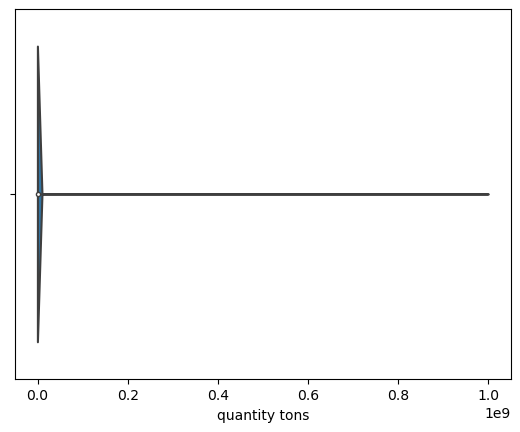

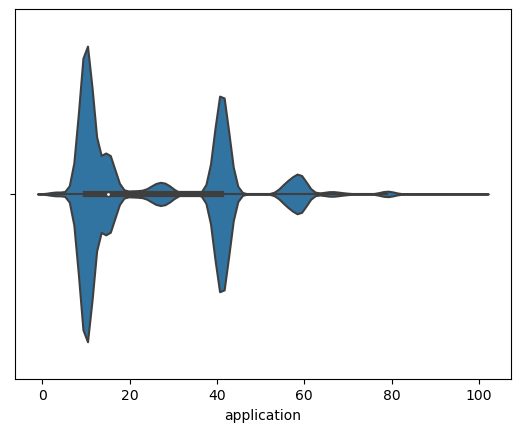

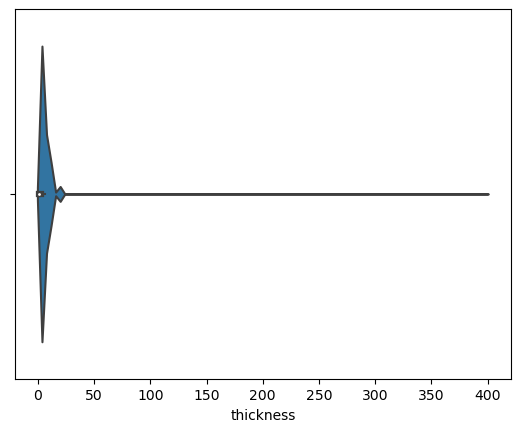

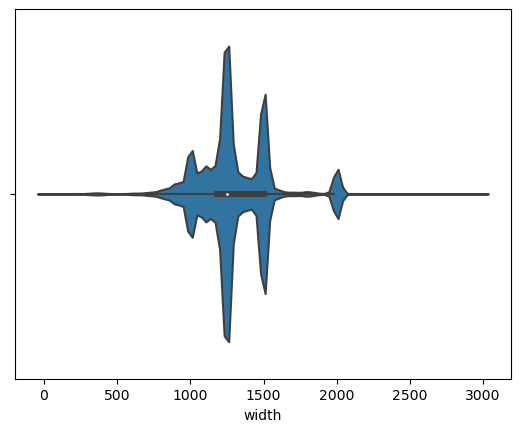

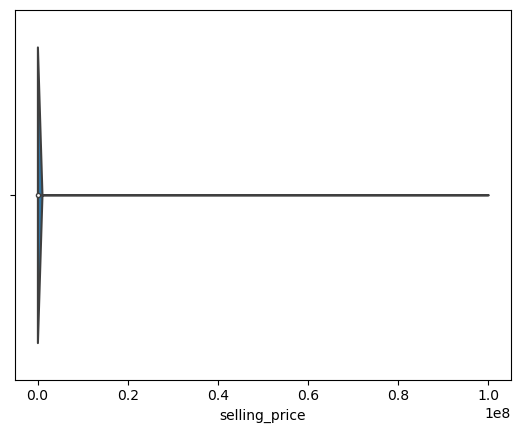

In [14]:
def plot(df, columns):
    sn.violinplot(data=df, x=columns)
    plt.show()

for col in columns:
    plot(df1, col)

In [15]:
df1.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])

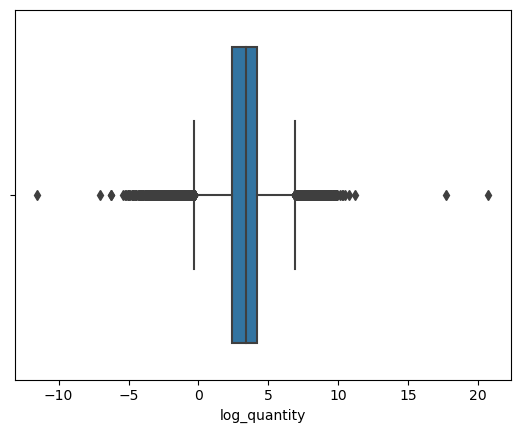

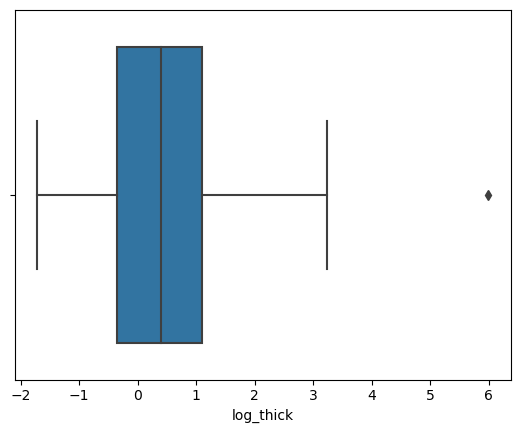

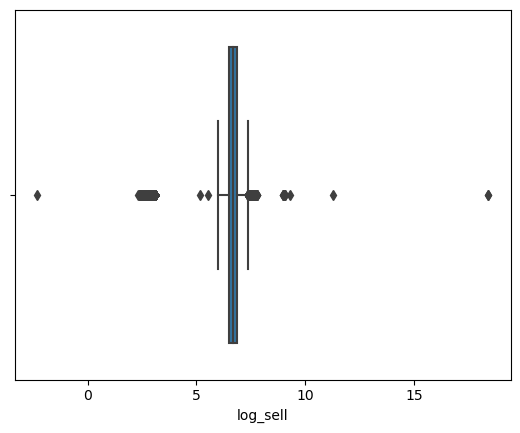

In [17]:
# Create a DataFrame with the log-transformed columns
df_log_transformed = pd.DataFrame({
    'log_quantity': df1['quantity tons_log'],
    'log_thick': df1['thickness_log'],
    'log_sell': df1['selling_price_log']
})

# Plot boxplots for the log-transformed columns
for col in df_log_transformed.columns:
    sn.boxplot(data=df_log_transformed, x=col)
    
    plt.show()


In [18]:
df1.isna().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
quantity tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

In [19]:
def outliers(df, columns):
    for i in columns:
        # Calculate IQR
        Q1 = np.percentile(df[i], 25)
        Q3 = np.percentile(df[i], 75)
        IQR = Q3 - Q1
        
        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip the values (replace outliers)
        df[i] = df[i].clip(lower_bound, upper_bound)
    
    return df

# Usage
columns = ['quantity tons', 'thickness', 'width', 'selling_price']
df1_cleaned = outliers(df1, columns)


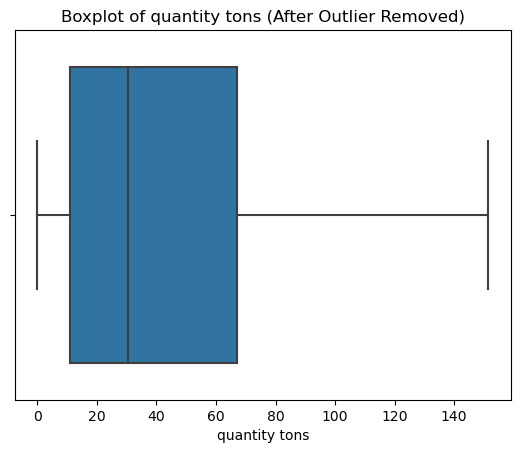

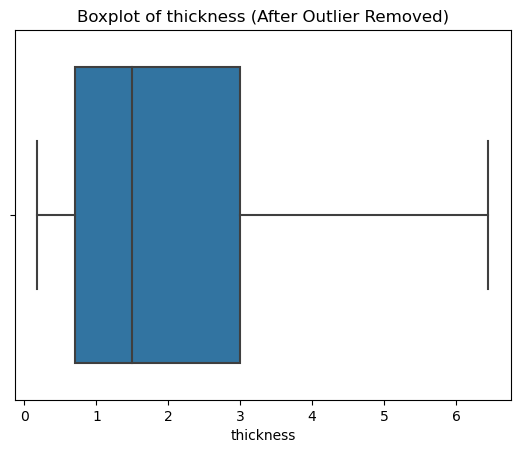

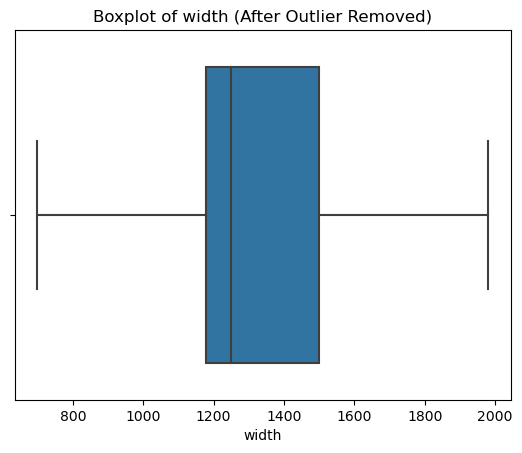

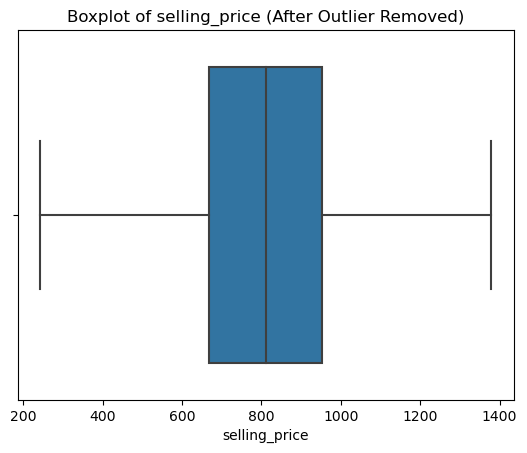

In [20]:
for col in columns:
    sn.boxplot(data=df1, x=col)
    plt.title(f'Boxplot of {col} (After Outlier Removed)')
    plt.show()

In [21]:
df1.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,151.455243,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,151.455243,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211


<Axes: >

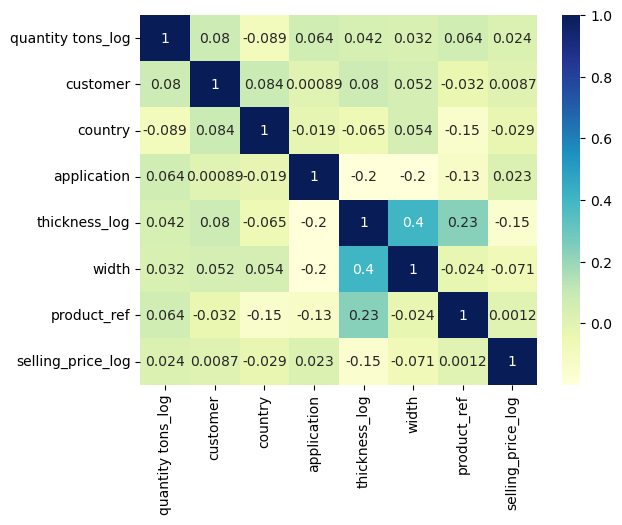

In [22]:
x=df1[['quantity tons_log', 'customer', 'country', 'application', 'thickness_log', 'width', 'product_ref', 'selling_price_log']].corr()
sn.heatmap(x, annot=True, cmap="YlGnBu")

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Prepare the feature set and target variable
x = df1[['quantity tons_log', 'status', 'item type', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]
y = df1['selling_price_log']

# Initialize and fit OneHotEncoders
encoding_type = OneHotEncoder(handle_unknown='ignore')
encoding_type.fit(x[['item type']])

encoding_status = OneHotEncoder(handle_unknown='ignore')
encoding_status.fit(x[['status']])

# Transform the features
encoding_type_tran = encoding_type.transform(x[['item type']]).toarray()
encoding_status_tran = encoding_status.transform(x[['status']]).toarray()

# Combine the numerical features with the encoded categorical features
X = np.concatenate((x[['quantity tons_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']].values, encoding_type_tran, encoding_status_tran), axis=1)

# Standardize the features
scaler = StandardScaler()
z = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.1, random_state=42)

# Define and tune the DecisionTreeRegressor model
model = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the model
test_pred = best_model.predict(X_test)
print(f"MSE Test: {mean_squared_error(y_test, test_pred)}")
print(f"R2 Test: {r2_score(y_test, test_pred)}")


c:\Users\Bala Krishnan\anaconda3\Anaconda new\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Bala Krishnan\anaconda3\Anaconda new\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Bala Krishnan\anaconda3\Anaconda new\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Bala Krishnan\anaconda3\Anaconda new\Lib\site-packages\sklearn\base.py", line 666, in _validate_params


Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
MSE Test: 0.030425202953174666
R2 Test: 0.9055619483642972


In [24]:
# Prepare new sample for prediction
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28, 30202938, 1670798778, 'PL', 'Won']])
new_sample_type = encoding_type.transform(new_sample[:, [7]]).toarray()
new_sample_status = encoding_status.transform(new_sample[:, [8]]).toarray()

# Combine the new sample features
# Note: Make sure the number of columns in new_sample matches X_train
new_sample_numerical = new_sample[:, [0, 1, 2, 3, 4, 5, 6]]
new_sample_combined = np.concatenate((new_sample_numerical, new_sample_type, new_sample_status), axis=1)

# Standardize the new sample
new_sample_scaled = scaler.transform(new_sample_combined)

# Predict and output the selling price
new_pred = best_model.predict(new_sample_scaled)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [689.45800831]


c:\Users\Bala Krishnan\anaconda3\Anaconda new\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bala Krishnan\anaconda3\Anaconda new\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [25]:
import pickle as pk

In [26]:
with open('model.pkl', 'wb') as file:
    pk.dump(best_model, file)

with open('scalar.pkl', 'wb') as file:
    pk.dump(scaler,file)

with open('type.pkl', 'wb') as file:
    pk.dump(encoding_type, file)

with open('status.pkl', 'wb') as file:
    pk.dump(encoding_status, file)


In [27]:
df1.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,151.455243,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0,6.643822,-0.223144,6.953684


In [28]:
df2 = df1[df1['status'].isin(['Won', 'Lost'])]
len(df2)

150427

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
x = df2[['quantity tons_log', 'selling_price_log', 'item type', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]
y = df2['status']

encoding_type = OneHotEncoder(handle_unknown='ignore')
encoding_type.fit(x[['item type']])
encoding_type_tran = encoding_type.transform(x[['item type']]).toarray()

X = np.concatenate((x[['quantity tons_log', 'selling_price_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']].values, encoding_type_tran), axis=1)

be = LabelBinarizer()
be.fit(y)
y = be.fit_transform(y)
scaler = StandardScaler()
z = scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1: {f1_score(y_test, y_pred, average='macro')}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix : {cm}")


Accuracy: 0.9115203084491126
F1: 0.8760645598947565
Confusion Matrix : [[ 5666  1336]
 [ 1326 21758]]


Confusion Matrix : [[ 5666  1336]
 [ 1326 21758]]
Classification Report : (array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]]), array([1, 0, 0, ..., 0, 1, 1]))


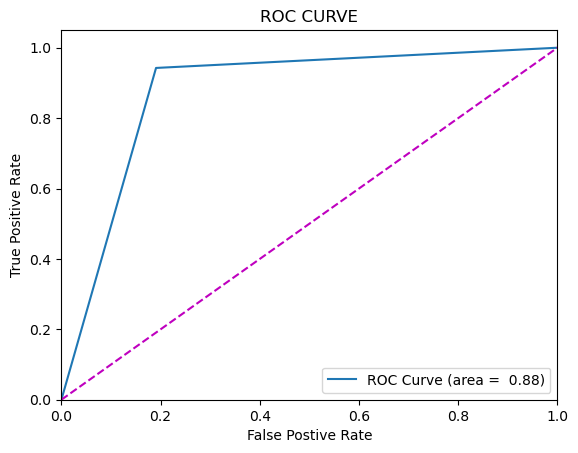

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc 
import matplotlib.pyplot as plt
print(f"Confusion Matrix : {cm}")
print(f"Classification Report : {(y_test, y_pred)}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'ROC Curve (area = % 0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [33]:
# Sample data
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2), 1500, 28.0, 30202938, 1670798778, 'W']])

# Encoding categorical variable (type)
new_sample_type = encoding_type.transform(new_sample[:, [8]]).toarray()

# Combine the new sample features (without status, as it's not provided in the sample)
new_sample_numerical = new_sample[:, [0, 1, 2, 3, 4, 5, 6, 7]]
new_sample_combined = np.concatenate((new_sample_numerical, new_sample_type), axis=1)

# Standardize the new sample
new_sample_scaled = scaler.transform(new_sample_combined)

# Predict and output the selling price
new_pred = model.predict(new_sample_scaled)
if new_pred == 1:
    print('Status is : Won')
else:
    print('Status is : Lost')


Status is : Lost


c:\Users\Bala Krishnan\anaconda3\Anaconda new\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [34]:
with open('Classific-model.pkl', 'wb') as file:
    pk.dump(model, file)

with open('Classific-scalar.pkl', 'wb') as file:
    pk.dump(scaler,file)

with open('Classific-type.pkl', 'wb') as file:
    pk.dump(encoding_type, file)